<a href="https://colab.research.google.com/github/Qianyi0315/2025HUDS/blob/main/Research_Skeleton_Notebook_Ghana_THREAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question: What is the association between internal migration and depression rates in Ghana from 2018 to 2019?

Problem Statement: The WHO's Comprehensive Mental Health Action 2013-2030 has identified economic, physical, and social factors as the primary changes that need to be made to improve mental health worldwide. In Ghana, 13% of the population is estimated to experience mental disorders such as anxiety and depression while only 2% receive treatment. To determine the extent of which these factors impact mental health, we can look internal migration and its causes to see its correlation with depression from 2018 to 2019 to predict trends in the future. As Ghanians relocate internally, we suspect they are more likely to experience depressive feelings than those who did not relocate into new economic, physical and social environments.

## Examine the dataset

Describe the methodology in words. What will you do in this section of the analysis?
Techniques to be completed in this section: Load the Dataset, check the data types, missing values, completeness of data, and create a data dictionary.

### Import libraries

In [1]:
# Import the libraries
import numpy as np                  # Scientific Computing
import pandas as pd                 # Data Analysis
import matplotlib.pyplot as plt     # Plotting
import seaborn as sns               # Statistical Data Visualization

# Let's make sure pandas returns all the rows and columns for the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Force pandas to display full numbers instead of scientific notation
# pd.options.display.float_format = '{:.0f}'.format

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import requests

base_url = "https://github.com/laketalkemp/2025-HUDS-Bootcamp/tree/main/Data/THREADS/Wave_3"


file_names = ["00_hh_info", "10ai_depression", "01hii_migrationhistory", "03bv_savingquestions"]

dataframes = {}

for file in file_names:
    url = base_url + file + '.dta'
    print(url)
    r = requests.get(url)
    if r.status_code == 200:
        with open(file, 'wb') as f:
            f.write(r.content)
        try:
          df = pd.read_stata(file, convert_categoricals=False)
          dataframes[file] = df
          print(f"Loaded {file} with shape {df.shape}")
        except Exception as e:
            print(f"Error loading {file}: {e}")
    else:
        print(f"Failed to download {file}")


https://github.com/laketalkemp/2025-HUDS-Bootcamp/tree/main/Data/THREADS/Wave_300_hh_info.dta
Failed to download 00_hh_info
https://github.com/laketalkemp/2025-HUDS-Bootcamp/tree/main/Data/THREADS/Wave_310ai_depression.dta
Failed to download 10ai_depression
https://github.com/laketalkemp/2025-HUDS-Bootcamp/tree/main/Data/THREADS/Wave_301hii_migrationhistory.dta
Failed to download 01hii_migrationhistory
https://github.com/laketalkemp/2025-HUDS-Bootcamp/tree/main/Data/THREADS/Wave_303bv_savingquestions.dta
Failed to download 03bv_savingquestions


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Read the dataset

In [4]:
# Designate the path
path = "/content/drive/MyDrive/DataSets/Ghana Dataset/"



# Create a list of files
files = ["10ai_depression", "01hii_migrationhistory", "03bv_savingquestions"]

filenames=[]
# Add the file suffix
for file in files:
    full_filename = path + file + '.dta'
    filenames.append(full_filename)

#### Understanding the Dataset
- Checking first elements of the DataFrame with .head( ) method
- After you run the code above, nothing will appear.
- So you have to write df to see your data. But instead of seeing all the data, we are going to use the “.head( )” method to see the first five elements of the data.
- Before you run the read_csv code, you can write df.head( ) below. So it’s going to be like this:

Inside the parentheses, we can write the number of elements that we want to see.
If we leave it blank, it will show the first five elements.
If we write 7 inside of the parentheses, it will show the first 7 elements of the dataframe.

In [5]:
type(filenames)

list

In [6]:
# Read the datasets
migration = pd.read_stata("/content/drive/MyDrive/Colab Notebooks/01hii_Wave3migrationhistory.dta")

In [7]:
migration.head(10)
# Keep useful columns
migration = migration[['FPrimary', 'wheremigrate_country']]
migration.columns.tolist()

['FPrimary', 'wheremigrate_country']

In [8]:
depression = pd.read_stata("/content/drive/MyDrive/Colab Notebooks/10ai_Wave3depression.dta")

In [9]:
depression = depression[['FPrimary', 'tired', 'nervous', 'sonervous', 'hopeless', 'restless',
    'sorestless', 'depressed', 'everythingeffort',
    'nothingcheerup', 'worthless']]
depression.columns.tolist()
depression.head(10)

,FPrimary,tired,nervous,sonervous,hopeless,restless,sorestless,depressed,everythingeffort,nothingcheerup,worthless
0,1008308001,A little of the time,A little of the time,A little of the time,A little of the time,None of the time,A little of the time,A little of the time,A little of the time,A little of the time,None of the time
1,1009320001,Some of the time,Some of the time,None of the time,Some of the time,Some of the time,A little of the time,Some of the time,A little of the time,Some of the time,Some of the time
2,1009320001,A little of the time,Some of the time,A little of the time,Some of the time,Some of the time,Some of the time,Some of the time,Some of the time,A little of the time,A little of the time
3,1009320001,None of the time,None of the time,None of the time,Some of the time,Some of the time,None of the time,Some of the time,A little of the time,A little of the time,None of the time
4,101001002,A little of the time,None of the time,None of the time,None of the time,None of the time,None of the time,A little of the time,A little of the time,A little of the time,None of the time
5,101001002,A little of the time,None of the time,None of the time,Most of the time,A little of the time,None of the time,Some of the time,Most of the time,None of the time,None of the time
6,101001003,A little of the time,A little of the time,None of the time,None of the time,None of the time,None of the time,Some of the time,Most of the time,None of the time,None of the time
7,101001003,A little of the time,A little of the time,None of the time,None of the time,A little of the time,None of the time,Some of the time,A little of the time,None of the time,None of the time
8,101001004,None of the time,None of the time,None of the time,A little of the time,A little of the time,None of the time,None of the time,Some of the time,None of the time,None of the time
9,101001009,None of the time,None of the time,None of the time,None of the time,None of the time,None of the time,None of the time,None of the time,None of the time,None of the time


Assign depression answers with 1-5 score

In [10]:
likert_scores = {
    "None of the time": 1,
    "A little of the time": 2,
    "Some of the time": 3,
    "Most of the time": 4,
    "All of the time": 5
}
# Get all columns to map (exclude FPrimary)
columns_to_map = [col for col in depression.columns if col != 'FPrimary']

# Apply the mapping
depression[columns_to_map] = depression[columns_to_map].replace(likert_scores)

# Optional: preview the result
print(depression.head(10))

     FPrimary tired nervous sonervous hopeless restless sorestless depressed  \
0  1008308001     2       2         2        2        1          2         2   
1  1009320001     3       3         1        3        3          2         3   
2  1009320001     2       3         2        3        3          3         3   
3  1009320001     1       1         1        3        3          1         3   
4   101001002     2       1         1        1        1          1         2   
5   101001002     2       1         1        4        2          1         3   
6   101001003     2       2         1        1        1          1         3   
7   101001003     2       2         1        1        2          1         3   
8   101001004     1       1         1        2        2          1         1   
9   101001009     1       1         1        1        1          1         1   

  everythingeffort nothingcheerup worthless  
0                2              2         1  
1                2         

In [11]:
# Define the columns to convert (exclude FPrimary)
question_cols = [col for col in depression.columns if col != 'FPrimary']

# Convert category columns to numeric (from category → object → int)
depression[question_cols] = depression[question_cols].apply(lambda col: pd.to_numeric(col.astype(str), errors='coerce'))

depression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11666 entries, 0 to 11665
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FPrimary          11666 non-null  object 
 1   tired             10567 non-null  float64
 2   nervous           10568 non-null  float64
 3   sonervous         10568 non-null  float64
 4   hopeless          10565 non-null  float64
 5   restless          10564 non-null  float64
 6   sorestless        10563 non-null  float64
 7   depressed         10566 non-null  float64
 8   everythingeffort  10560 non-null  float64
 9   nothingcheerup    10565 non-null  float64
 10  worthless         10566 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1002.7+ KB


In [12]:
# Now safely compute the total score
depression['total_score'] = depression[question_cols].sum(axis=1)

# Preview result
print(depression[['FPrimary', 'total_score']].head(15))

      FPrimary  total_score
0   1008308001         18.0
1   1009320001         26.0
2   1009320001         26.0
3   1009320001         18.0
4    101001002         14.0
5    101001002         20.0
6    101001003         17.0
7    101001003         16.0
8    101001004         14.0
9    101001009         10.0
10   101001010         21.0
11   101001010         24.0
12   101001010         22.0
13   101001012         12.0
14   101001013         31.0


In [13]:
savings = pd.read_stata("/content/drive/MyDrive/Colab Notebooks/03bv_Wave3savingquestions.dta")


In [14]:
savings = savings[['FPrimary', 'savingsathome',
    'savingswithoth']]
savings.columns.tolist()

['FPrimary', 'savingsathome', 'savingswithoth']

In [15]:
migration.head(7)

,FPrimary,wheremigrate_country
0,1008308001,
1,1009320001,
2,1009320001,
3,1009320001,
4,101001002,Ghana
5,101001002,Ghana
6,101001002,


In [16]:
depression.head(7)

,FPrimary,tired,nervous,sonervous,hopeless,restless,sorestless,depressed,everythingeffort,nothingcheerup,worthless,total_score
0,1008308001,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,18.0
1,1009320001,3.0,3.0,1.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,26.0
2,1009320001,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,26.0
3,1009320001,1.0,1.0,1.0,3.0,3.0,1.0,3.0,2.0,2.0,1.0,18.0
4,101001002,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,14.0
5,101001002,2.0,1.0,1.0,4.0,2.0,1.0,3.0,4.0,1.0,1.0,20.0
6,101001003,2.0,2.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,1.0,17.0


In [17]:
savings.head(7)

,FPrimary,savingsathome,savingswithoth
0,1008308001,Yes,No
1,101001002,No,Yes
2,101001002,No,Yes
3,101001003,No,Yes
4,101001003,No,Yes
5,101001003,No,Yes
6,101001003,No,Yes


#Checking for duplicate rows in each dataset that lead to too many rows after merging.
#Reducing each dataset to only contain unique rows before merging them.

In [18]:
print(migration['FPrimary'].nunique(), migration.shape[0])  # Unique IDs vs total rows

5669 20140


In [19]:
migration_unique = migration.drop_duplicates(subset='FPrimary')
migration_unique.shape

(5669, 2)

In [20]:
print(depression['FPrimary'].nunique(), depression.shape[0])  # Unique IDs vs total rows

5655 11666


In [21]:
depression_unique = depression.drop_duplicates(subset='FPrimary')
depression_unique.shape

(5655, 12)

In [22]:
print(savings['FPrimary'].nunique(), savings.shape[0])  # Unique IDs vs total rows

3366 4499


In [23]:
savings_unique = savings.drop_duplicates(subset='FPrimary')
savings_unique.shape

(3366, 3)

In [24]:
mergeGhanadata = pd.merge (migration_unique, depression_unique, on = 'FPrimary', how = 'inner')
mergeGhanadata = pd.merge (mergeGhanadata, savings_unique, on = 'FPrimary', how = 'inner' )


In [25]:
mergeGhanadata.shape

(3362, 15)

In [26]:
# Display the first ten rows of the dataframe
# Syntax: DataFrame.head(qty)
mergeGhanadata.head(7)

,FPrimary,wheremigrate_country,tired,nervous,sonervous,hopeless,restless,sorestless,depressed,everythingeffort,nothingcheerup,worthless,total_score,savingsathome,savingswithoth
0,1008308001,,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,18.0,Yes,No
1,101001002,Ghana,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,14.0,No,Yes
2,101001003,,2.0,2.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,1.0,17.0,No,Yes
3,101001004,Cote d'Ivoire,1.0,1.0,1.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,14.0,No,Yes
4,101001022,Ghana,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,Yes,Yes
5,101001024,,4.0,2.0,2.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,24.0,Yes,No
6,101001026,,4.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,2.0,21.0,No,Yes


Checking last elements of the DataFrame with .tail() method
There is also a method to see the see last n number of elements.
The method is called .tail().
The same rule is also applied here. If we leave the parentheses blank, it will be set as 5, if we write 7 inside of the parentheses, it will show the last 7 elements of the dataframe.

In [27]:
# Display the last ten rows of the dataframe
# Syntax: DataFrame.tail(qty)
mergeGhanadata.tail(7)

,FPrimary,wheremigrate_country,tired,nervous,sonervous,hopeless,restless,sorestless,depressed,everythingeffort,nothingcheerup,worthless,total_score,savingsathome,savingswithoth
3355,608308048,,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,15.0,No,Yes
3356,609320001,,2.0,2.0,3.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0,24.0,Yes,No
3357,708288001,,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,12.0,Yes,No
3358,709320001,,4.0,4.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,1.0,20.0,No,Yes
3359,808308001,,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,1.0,21.0,Yes,No
3360,908308001,,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,19.0,Yes,No
3361,909320001,,3.0,3.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,16.0,No,Yes


In [28]:
# display the dimensions of the data
# This is the number of rows and columns in the data
# Syntax: DataFrame.shape
mergeGhanadata.shape

(3362, 15)

* State the shape of the dataframe :
  - How many rows does the dataframe have?
  
It has 3362 rows.

### Data Types
* The main data types in Pandas dataframes are `object`, `float`, `int64`, `bool` and `datetime64`. In order to understand each attribute of the data, it is always good to know the data type of each column.

##### `.info()` method
* This method prints information about a DataFrame including the index `dtype` and column dtypes, non-null values and memory usage.

In [29]:
# Let's check the basic information about the dataset
# Syntax: DataFrame.info()
mergeGhanadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362 entries, 0 to 3361
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   FPrimary              3362 non-null   object  
 1   wheremigrate_country  3362 non-null   object  
 2   tired                 3237 non-null   float64 
 3   nervous               3238 non-null   float64 
 4   sonervous             3237 non-null   float64 
 5   hopeless              3237 non-null   float64 
 6   restless              3237 non-null   float64 
 7   sorestless            3237 non-null   float64 
 8   depressed             3238 non-null   float64 
 9   everythingeffort      3238 non-null   float64 
 10  nothingcheerup        3237 non-null   float64 
 11  worthless             3238 non-null   float64 
 12  total_score           3362 non-null   float64 
 13  savingsathome         3362 non-null   category
 14  savingswithoth        3362 non-null   category
dtypes: c

### Observations of the Data Set
Describe the dataset.
How many rows and columns are there?
3362 rows and 19 columns
What are the data types?
category(13), float32(3), float64(1), object(2)
Based on the number of expected data points, and those listed by the `.info()` method, how many missing (null) values are there?

The number of non-null values does not match the total number expected based on the number of rows in the dataframe. This indicates the presence of missing values that will need further investigation.



# Data Cleaning:



### Headers Update and Map New Column

>
- To aid in analysis and visualization add a new columns as needed. For instance instead of an entire state name, add a column that has a two letter abbreviation for the state.
- The list of headers requires standardization, these will be updated ensure uniformity.
- Update ALL CAPS or all lowercase to the appropriate case. These can be updated to Title Case.

In [30]:
# Let's create a list of the columns in the dataset
# Use the variable = DataFrame.columns method
mergeGhanadata.columns

Index(['FPrimary', 'wheremigrate_country', 'tired', 'nervous', 'sonervous',
       'hopeless', 'restless', 'sorestless', 'depressed', 'everythingeffort',
       'nothingcheerup', 'worthless', 'total_score', 'savingsathome',
       'savingswithoth'],
      dtype='object')

In [31]:
# Let's Update the Headers for Syntax Consistency
# Syntax: df = df.rename(columns={'currentColumnName':'newColumnName', 'nextCurrentColumnName':'nextNewColumnName'})

# Let's view the new columns and update the variable
# Pass the columns to the variable: Use the variable = DataFrame.columns method

# Call the variable to see the contents


In [32]:
# Let's update the string text in headers to Title case.
# Syntax: df['column'].str.title()
# mergeGhanadata.columns = [col.title() for col in mergeGhanadata.columns]
mergeGhanadata.columns = mergeGhanadata.columns.str.title()
# Let's See the results using the .head() method
# Syntax: DataFrame.head(qty)
mergeGhanadata.head(10)


,Fprimary,Wheremigrate_Country,Tired,Nervous,Sonervous,Hopeless,Restless,Sorestless,Depressed,Everythingeffort,Nothingcheerup,Worthless,Total_Score,Savingsathome,Savingswithoth
0,1008308001,,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,18.0,Yes,No
1,101001002,Ghana,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,14.0,No,Yes
2,101001003,,2.0,2.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,1.0,17.0,No,Yes
3,101001004,Cote d'Ivoire,1.0,1.0,1.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,14.0,No,Yes
4,101001022,Ghana,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,Yes,Yes
5,101001024,,4.0,2.0,2.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,24.0,Yes,No
6,101001026,,4.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,2.0,21.0,No,Yes
7,101001029,,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,No,Yes
8,101001034,,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,5.0,1.0,17.0,No,Yes
9,101001035,,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,11.0,No,Yes


In [33]:
# Let's create a new column
# The goal is to create a map function to apply the new information based on an existing column.
# Syntax: dictionaryName = ({key: value})
country_map = ({1 : 'central region'})
# Call the variable to see the contents
mergeGhanadata.head(3)

,Fprimary,Wheremigrate_Country,Tired,Nervous,Sonervous,Hopeless,Restless,Sorestless,Depressed,Everythingeffort,Nothingcheerup,Worthless,Total_Score,Savingsathome,Savingswithoth
0,1008308001,,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,18.0,Yes,No
1,101001002,Ghana,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,14.0,No,Yes
2,101001003,,2.0,2.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,1.0,17.0,No,Yes


### Missing Values
If we encounter with missing data, what we can do:

- leave as is
- drop them with `dropna()`
- fill missing value with `fillna()`
- fill missing values with test statistics like mean
- One of the most common problems in data science is missing values.
- To detect them, there is a beautiful method which is called `.isnull()`. With this method, we can get a boolean series (True or False).
- When we add the `.sum()` we can get the total count of missing values.



In [34]:
# Determine the number of missing values
# Syntax: DataFrame.isnull().sum()
mergeGhanadata.isnull().sum()

,0
Fprimary,0
Wheremigrate_Country,0
Tired,125
Nervous,124
Sonervous,125
Hopeless,125
Restless,125
Sorestless,125
Depressed,124
Everythingeffort,124


In [35]:
# Let's create a function to determine the percentage of missing values
# Typically less than five percent missing values may not affect the results
# More than 5% can be dropped, replaced with existing data, or imputed using mean or median.
# Syntax: def missing(DataFrame):
#    print ('Percentage of missing values in the dataset:\n',
#           round((DataFtame.isnull().sum() * 100/ len(DataFrame)),2).sort_values(ascending=False))
def missing(mergeGhanadata):
    print('Percentage of missing values in the dataset:\n',
            round((mergeGhanadata.isnull().sum() * 100/ len(mergeGhanadata)),2).sort_values(ascending=False))
# Call the function and execute
# Syntax: missing(DataFrame)
missing(mergeGhanadata)

Percentage of missing values in the dataset:
 Tired                   3.72
Hopeless                3.72
Sonervous               3.72
Restless                3.72
Sorestless              3.72
Nothingcheerup          3.72
Nervous                 3.69
Worthless               3.69
Everythingeffort        3.69
Depressed               3.69
Wheremigrate_Country    0.00
Fprimary                0.00
Total_Score             0.00
Savingsathome           0.00
Savingswithoth          0.00
dtype: float64


# Less than 5% so we decided to leave the missing values

In [36]:
# Drop the rows
# Syntax: DataFrame.dropna(*, axis=0, how=_NoDefault.no_default, thresh=_NoDefault.no_default, subset=None, inplace=False, ignore_index=False)

# Drop the columns by name
# Use either labels=[list] and columns=labels or columns=[list]
# Syntax: DataFrame.drop(labels=None, *, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

# Check the null count again
# Syntax: DataFrame.isnull().sum()


### Observations
- How many missing values are there?
- Are these concentrated in specific rows or columns? How does this affect the analysis?
- Based on the information that is present, how should the missing values be handled? How will this affect the analysis?

In [37]:
# Make a copy of the DataFrame before manipulation
# Syntax: DataFrameOG = workingDF
MergeGhanadataOld = mergeGhanadata

In [38]:
# Let's split the dataframe into subsets as needed.
# Syntax: NewSubsetDF = DataFrame.query('ColumnName == "ValuetoSplit"')
NewSubsetmergeGhanadata = mergeGhanadata.query('Wheremigrate_Country == "Ghana" or Wheremigrate_Country == ""')
# Check the new dataframe with .head() method.
NewSubsetmergeGhanadata.head(10)

,Fprimary,Wheremigrate_Country,Tired,Nervous,Sonervous,Hopeless,Restless,Sorestless,Depressed,Everythingeffort,Nothingcheerup,Worthless,Total_Score,Savingsathome,Savingswithoth
0,1008308001,,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,18.0,Yes,No
1,101001002,Ghana,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,14.0,No,Yes
2,101001003,,2.0,2.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,1.0,17.0,No,Yes
4,101001022,Ghana,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,Yes,Yes
5,101001024,,4.0,2.0,2.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,24.0,Yes,No
6,101001026,,4.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,2.0,21.0,No,Yes
7,101001029,,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,No,Yes
8,101001034,,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,5.0,1.0,17.0,No,Yes
9,101001035,,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,11.0,No,Yes
10,101002016,Ghana,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,Yes,Yes


In [39]:
# Let's remove the rows or columns from the original DF
# Syntax: DataFrame = DataFrame[DataFrame['ColumnName'] != 'ValuetoSplit']

# Check the Dataframe shape: DataFrame.shape


In [40]:
# Let's drop all the NaN values from the new DF
# Syntax: NewSubsetDF = NewSubsetDF.filter(items=['ColumnName1','ColumnName2','ColumnName3'])

# Check the DataFrame again: NewSubsetDF.head()


### Observations on Missing Values
Include observations on the methods used to update the dataFrame for missing values and complete the cleaning process.  Did you use a method to impute the missing data? Did you choose to drop null or NaN values? Did you split the dataset to create subsets? Use this space to explain the techniques, approach, and reasoning.


# Data Exploration:


## Summary Statistics

##### `.describe()` method

* This method is used to get a summary of numeric values in your dataset.
* It calculates the mean, standard deviation, minimum value, maximum value, 1st percentile, 2nd percentile, 3rd percentile of the columns with numeric values.
* It also counts the number of variables in the dataset.

In [41]:
## Describe the descriptive stats
# Syntax: DataFrame.describe()
mergeGhanadata.describe()
# Note: If we do not pass include=object to the describe(), it would return statistics for numeric variables only

,Tired,Nervous,Sonervous,Hopeless,Restless,Sorestless,Depressed,Everythingeffort,Nothingcheerup,Worthless,Total_Score
count,3237.000000,3238.000000,3237.000000,3237.000000,3237.000000,3237.000000,3238.000000,3238.000000,3237.000000,3238.000000,3362.000000
mean,2.173926,1.795553,1.405931,1.685511,1.626815,1.404078,1.889129,2.660284,1.724436,1.380173,17.088340
std,1.080087,0.929830,0.723225,0.986286,0.884769,0.709172,0.967050,1.450907,0.921887,0.746324,6.877401
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
50%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,16.000000
75%,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,2.000000,2.000000,21.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,50.000000


In [42]:
## Descriptive stats for subset DataFrame
NewSubsetmergeGhanadata.describe()

,Tired,Nervous,Sonervous,Hopeless,Restless,Sorestless,Depressed,Everythingeffort,Nothingcheerup,Worthless,Total_Score
count,3193.000000,3194.000000,3193.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3193.000000,3194.000000,3316.000000
mean,2.172878,1.794302,1.405575,1.684095,1.625235,1.404822,1.888541,2.656230,1.725963,1.381027,17.084439
std,1.077884,0.928016,0.723699,0.985051,0.883152,0.710435,0.965149,1.449488,0.921957,0.747747,6.868828
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
50%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,16.000000
75%,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,2.000000,2.000000,21.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,50.000000


#### Observations of Descriptive Statistics
The following are some observations about each table: <br>
DataFrame:
 * What are the minimum and maximum values?
 * What are the mean values for the data?
 * Are the mean and median values close to each other? If so this could indicate a normal distribution of the data. If not, this could indicate skewness in the data. If the mean is smaller than the median the values are likely skewed left, toward the minimum value. If the mean is larger than the median then there is skewness to the right indicating more high values in the data distribution.
 * What are the quartile ranges for the data? What value is the 25th percentile of the data? What value is the 75th percentile of the data?
 * How does the standard deviation for the data compare to the mean? High values for the standard deviation indicate a large variation in the data and likely a wide spread of the data across the range from minimum to maximum.<br>

Dataframe Subset:
* Consider the same questions above.

##For total score of depression

Minimum is 0, Maximum is 50

Mean is 17.0844

Median is 16

Mean (17.08) is slightly higher than the median (16).
This suggests a slight right-skew (longer tail toward higher depression scores).
The skewness is not extreme, so the data is close to symmetric, but not perfectly normal.

25% is 12

75% is 21

IQR is 9

std is 6.8688

Standard Deviation (6.87) is moderate compared to the mean (17.08).
This shows that most values are within a fairly tight range of the mean, but with some variation.


In [43]:
NewSubsetmergeGhanadata.describe()

,Tired,Nervous,Sonervous,Hopeless,Restless,Sorestless,Depressed,Everythingeffort,Nothingcheerup,Worthless,Total_Score
count,3193.000000,3194.000000,3193.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3193.000000,3194.000000,3316.000000
mean,2.172878,1.794302,1.405575,1.684095,1.625235,1.404822,1.888541,2.656230,1.725963,1.381027,17.084439
std,1.077884,0.928016,0.723699,0.985051,0.883152,0.710435,0.965149,1.449488,0.921957,0.747747,6.868828
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
50%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,16.000000
75%,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,2.000000,2.000000,21.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,50.000000


* Correlation is a statistic that measures the degree to which two variables move in relation to each other. A positive correlation indicates
* the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable
* increases as the other decreases. Correction among multiple variables can be represented in the form of a matrix. This allows us to see which pairs have the high correlations.
* correlation Correlation is a mutual relationship or connection between two or more things. It takes a value between (+1) and (-1)
* One important note here; Correlation can be created between integer values, so columns come with string values will not be included.

In [44]:
# Create a new binary variable
NewSubsetmergeGhanadata['migrated_in_country'] = NewSubsetmergeGhanadata['Wheremigrate_Country'].apply(lambda x: 1 if x == 'Ghana' else 0)
# Calculate correlation with total_score
NewSubsetmergeGhanadata.head(5)
#migrated_in_country created

,Fprimary,Wheremigrate_Country,Tired,Nervous,Sonervous,Hopeless,Restless,Sorestless,Depressed,Everythingeffort,Nothingcheerup,Worthless,Total_Score,Savingsathome,Savingswithoth,migrated_in_country
0,1008308001,,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,18.0,Yes,No,0
1,101001002,Ghana,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,14.0,No,Yes,1
2,101001003,,2.0,2.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,1.0,17.0,No,Yes,0
4,101001022,Ghana,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,Yes,Yes,1
5,101001024,,4.0,2.0,2.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,24.0,Yes,No,0


In [45]:
# Create correlation matrix
# Syntax: variableCorr = DataFrame.corr()

# Now call the correlation variable to see the correlation matrix.
correlation_matrix = NewSubsetmergeGhanadata[['Total_Score', 'migrated_in_country']].corr()

# Step 3: Print correlation matrix
print(correlation_matrix)

                     Total_Score  migrated_in_country
Total_Score             1.000000             0.049039
migrated_in_country     0.049039             1.000000


### Observations of the Correlation Matrix


Correlation matrices can be viewed in a visualization or a visual table that shows the relative relationship between the variables using color while stating their values. We will use a color map (cmap) with a high contrast to see those that correlate by color. Remember that a correlation matrix is a square that is a mirror image across the diagonal. This means the bottom half of the matric looks exactly like the top half of the matrix. To minimize the values to view, let's use the `triu` argument to view just the lower half of the correlation matrix.

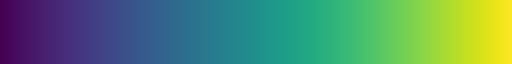

In [46]:
# Set seaborn themes
sns.set_theme(style='white')
sns.color_palette('viridis', as_cmap=True)

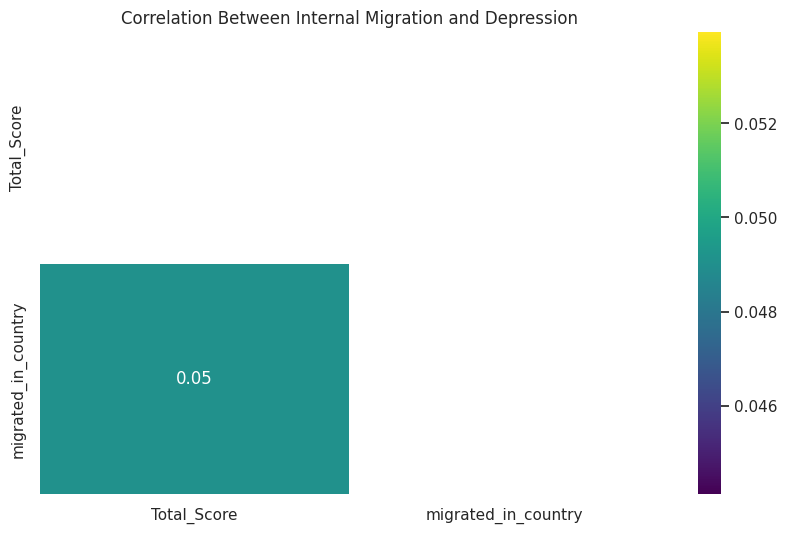

In [47]:
# To get a correlation matrix
# Ploting the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws={"size": 12}): Sets the font size of the annotation

# Create the plot
plt.figure(figsize=(10,6))
matrix = correlation_matrix
mask = np.triu(np.ones_like(matrix, dtype=float))
sns.heatmap(correlation_matrix,
           annot=True,
           linewidths=.5,
           cmap='viridis',
           fmt= '.2f',
           mask=mask)

# Specify the name of the plot
plt.title('Correlation Between Internal Migration and Depression')
plt.show()

### Observations
- Are all the values the same color? This is called multicolinearity and indicates there are multiple independent variables that each have a strong relationship on each other. For instance if you are examining crime data categories such as robbery may also correlate to vehicular theft as the assailant was charged with both crimes. While they are independent crimes, they often occur together indicating a relationship. Multicolinear relationships complicate feature engineering for machine learning models and may need to have their dimensionality reduced (dropping columns or further subsets) to make sure the model trains well for those specific variables.

- Are specific variables correlated higher than others?
- Are there negative correlations indicating an inverse relationship in the variables? This indicates that as one variable is increasing, the other variable is decreasing. Negative correlations can be high (close to -1) or low (close to 0).
- Remember that correlation does not equal causation. Be careful with your wording when establishing relationships between the variables.
- Are there variables that lack correlation to any other variable? These are variables that may not be needed in the analysis and can be used to reduce the dimensionality of the data.

# Correlation is nearly 0

Additional Statistical methods are possible. Python is a mathematical programming language and can perform inferential statistics, hypothesis testing, probability distributions, and multivariate statistical analysis.

## Visualizations
Create Visualizations to aid in the interpretation of the data and answering of the research problem. Using Python plotting libraries seaborn, matplotlib, plotly, or bokeh multiple plots will be completed to see trends and insights in the data.
  - Use charts, graphs, maps, and other plots to answer questions related to your research question.
  - Bivariate analysis is the process of examing two variables to visualize their relationship. Choose variables from the correlation matrix to see how they affect each other.
  - Be sure to use the correct chart for the type of information you need.

In [48]:
# Set Plotly themes
# Javascript Interactive Visualization (computationally expensive)
import plotly.express as px
import plotly.io as pio
pio.templates.default = 'plotly_white'

In [49]:
# Set Bokeh themes
# bokeh.palettes.Viridis256
import bokeh as bk
from bokeh.layouts import column
from bokeh.plotting import figure, output_file, show, curdoc
from bokeh.io import output_notebook, push_notebook, show
from bokeh.models import Scatter, ColumnDataSource, Div, RangeSlider, Spinner, CustomJS
# apply theme to current document
curdoc().theme = 'light_minimal'

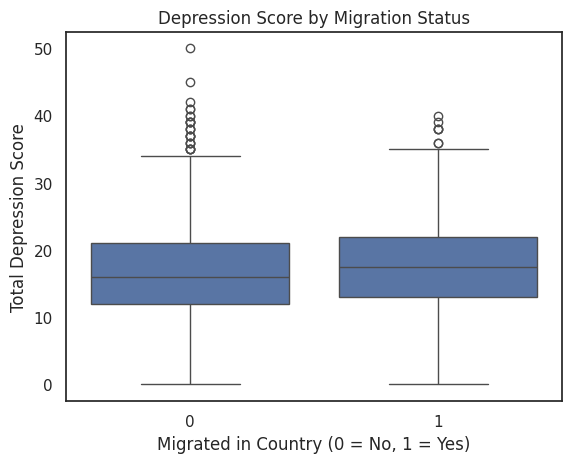

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
# get a box plot comparing different migtation status' depression scores
sns.boxplot(x='migrated_in_country', y='Total_Score', data=NewSubsetmergeGhanadata)
plt.title('Depression Score by Migration Status')
plt.xlabel('Migrated in Country (0 = No, 1 = Yes)')
plt.ylabel('Total Depression Score')
plt.show()


* The migrated group (1) has a slightly higher median and likely higher mean, which aligns with your earlier finding of a weak positive correlation (r = 0.05).
* Neither group shows significant skewness, but group 0 has more extreme high outliers.


In [51]:
# Generate Box and Whisker chart
# Import matplot lib to generate chart
import matplotlib.pyplot as plt
labels = DataFrameCols

# Build the plot:
# two rows of three plots each
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=True)

# first plot, row 1 column 1
axs[0, 0].boxplot(NewSubsetmergeGhanadata['Column Name1'])
axs[0, 0].set_title('Column Name1')

# second plot, row 1 column 2
axs[0, 1].boxplot(DataFrameName['Column Name2'])
axs[0, 1].set_title('Column Name2')

# third plot, row 1 column 3
axs[0, 2].boxplot(DataFrameName['Column Name3'])
axs[0, 2].set_title('Column Name3')

# fourth plot, row 2 column 1
axs[1, 0].boxplot(DataFrameName['Column Name4'])
axs[1, 0].set_title('Column Name4')

# fifth plot, row 2 column 2
axs[1, 1].boxplot(DataFrameName['Column Name5'])
axs[1, 1].set_title('Column Name5')

# sixth plot, row 2 column 3
axs[1, 2].boxplot(DataFrameName['Column Name6'])
axs[1, 2].set_title('Column Name6')

# Designate scale
for ax in axs.flat:
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
plt.show()

NameError: name 'DataFrameCols' is not defined

### Observations: Boxplot
The boxplots show the presence of outliers beyond the top whiskers with a narrow data spread and a large number of upper outliers.

**Migrate_in_Country = 1 (did not migrate)**
- The minimum value is:0
- The maximum value is:50
- The median value is: 15
- The mean value is: 16-17
<br>

**Migrate_in_Country = 0 (did migrate)**
- The minimum value is:0
- The maximum value is:40
- The median value is:17-18
- The mean value is:18-19
<br>

**Column Name3**
- The minimum value is:
- The maximum value is:
- The median value is:
- The mean value is:
<br>

**Column Name4**
- The minimum value is:
- The maximum value is:
- The median value is:
- The mean value is:
<br>

**Column Name5**
- The minimum value is:
- The maximum value is:
- The median value is:
- The mean value is:
<br>

**Column Name6**
- The minimum value is:
- The maximum value is:
- The median value is:
- The mean value is:

In [ ]:
# Group data by variable1 and calculate the average percentage of variable2 for each variable1
# Syntax: averageVariable1 = DataFrame.groupby('variable1')['variable2'].mean()

# Sort variable1 based on the highest average percentage of variable2
# Syntax: maxVariable1 = averageVariable1.sort_values(ascending=False).head(50)

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(maxVariable1.index, maxVariable1.values)
plt.xlabel('variable1')
plt.ylabel('Average Percentage of variable2')
plt.title('variable1 with Highest Average Percentage of variable2')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
# Show the visualization
plt.show()

### Observations: Scatter Plot
Each visualization should have a summary of the findings.

In [ ]:
# Create an averages table
variable_avg = DataFrame.groupby('Variable').mean().sort_values(by='sortingVariable',ascending=False)
variable_avg

# Create visualization
fig = px.bar(variable_avg,
             x="State Population",
             y=variable_avg.index,
             color=variable_avg.index,
             orientation='h',
             height=1000,
             title='Plot Title')

fig.show()

### Observations: Bar Chart
Each visualization should have a summary of the findings.

 ### Research Question: Insert Primary Research Question Here
Explain how the technique this visualization uses describes the research question.

In [ ]:
# Create visualization
fig  = px.scatter(DataFrame,x='VariableName',
                  y = 'VariableName2',
                  title = 'Average VariableName versus Average VariableName2 by Hue',
                  color = VariableVariationByColor.index)
fig.show()

#### Observations
Each visualization should have a summary of the findings.

### Research Question: Insert Secondary Research Question Here
Explain how the technique this visualization uses describes the research question.

In [ ]:
# Create visualization
fig = px.line(DatFrame, x="Variable1",
              y="Variable2",
              color="Variable3",
              title='Chart Title')
fig.show()

#### Observations
From this visualization, we observe the following:
  - Observations from your visualization should be described here.

### Research Question: Insert Tertiary Research Question Here
Explain how the technique this visualization uses describes the research question.

In [ ]:
# Create visualization
fig = px.pie(DataFrame, values= 'Variable1',
             names=DataFrame.index,
             height=1000,
             title='Chart Title')
fig.show()

In [ ]:
# Create visualization
fig = px.pie(DataFrame, values= 'Variable1',
             names=DataFrame.index,
             height=1000,
             title='Chart Title')
fig.show()

# Data Preparation:






# Data Modeling:
Model Selection












# Model Evaluation:  
How would you evaluate your results?



Several key metrics can be used to evaluate a machine learning model. Some of the most important metrics include:

- *Accuracy:* The percentage of predictions that the model makes correctly.
- *Precision:* The proportion of true positives that the model predicts correctly. It measures how good the model is at avoiding false positives.
- *Recall:* the proportion of true positives that the model predicts. It measures how good the model is at avoiding false negatives.
- *F1 score:* This measure of accuracy and recall considers both. This is a weighted harmonic mean of precision and recall. It is a more comprehensive measure of the model's performance than either precision or recall alone.
- *Area under the ROC curve (AUC):* This measures the model's ability to distinguish between positive and negative examples. It is a more robust metric than accuracy for imbalanced datasets.
- *MCC (Matthews correlation coefficient):* This metric measures the accuracy of a classification model. It is more robust to class imbalance than accuracy.

The specific metrics considered will depend on the particular application of the model. For example, if the model is being used to predict whether someone will commit a crime, then accuracy and AUC may be the most critical metrics. However, precision and recall may be more meaningful if the model is used to identify the factors most predictive of types of crime.  For example, metrics should focus on accuracy, precision, and recall if the model is used to predict criminal recidivism. However, if the model is used to identify fraud, the focus is on metrics such as AUC. If the research question requires minimizing the number of false positives, then the focus is on the precision metric. However, if the need is to reduce the number of false negatives, focus on the recall metric. Suppose the research question seeks to identify individuals at risk of re-offending. In that case, you focus on the recall metric, as the goal is to identify as many people as possible who are at risk.

It is also essential to consider the limitations of these metrics. Accuracy, precision, recall, and F1 score can all be misleading if the data is imbalanced. For example, if there are many more negative examples than positive examples, then the model may achieve high accuracy even if it is not very good at predicting positive examples. AUC is less sensitive to imbalanced data, but it is still essential to consider the distribution of the data when interpreting this metric. Precision and recall can be misleading if the cost of false positives and false negatives is not equal. AUC-ROC is not as sensitive to class imbalance as accuracy, but it can be misleading if the classes are imbalanced. MCC is a more robust metric than accuracy, precision, and recall, but it is less commonly used.

It is also essential to consider the limitations of models. Some machine models can be sensitive to outliers and noise in the data. Additionally, some models, such as SVM models, can be computationally expensive to train. In addition to these metrics, it is also important to consider the following factors when evaluating a machine learning model:

* **Complexity:** The complexity of the model can affect its performance and interpretability.
* **Interpretability:** The interpretability of the model can be important for understanding how it works and making decisions based on its predictions.
* **Robustness:** The robustness of the model can be necessary for ensuring that the model performs well on new data.
By considering these factors, you can better evaluate the performance of a support vector machine learning model and make informed decisions about how to use the model.


# Model Deployment:
Where would you deploy this personal model and whom would you want to see it?


# Presentation Modality
When presenting the results of your analysis as a Data Scientist there are two additional documents that are used, the Executive Summary and a visual presentation. These documents do not have to be created from scratch, there is a Python library, **pandoc** that will export the information from your notebook into multiple formats. Before you begin the library must be installed and updated to the latest format.

Install will install the most current version of pandoc in the Jupyter or Colab environment:

    pip install pandoc

Upgrade will install the most current version of pandoc in the Jupyter or Colab environment:

    pip install --upgrade pandoc

You will need to make sure `nbconvert` is installed to use the feature:

    pip install nbconvert
    
The full documentation for pandoc can be read here: https://pandoc.org/MANUAL.html. Pandoc is reading the Python file and exporting into a format that is readable by text editors and presentation viewers. The export is not perfect, the documents should always be reviewed and editied to ensure the quality of information being presented.

To get started, open a terminal window on your computer or within Jupyter Notebooks terminal. The next step is to navigate to the folder where the .ipynb file is located. Now run the following line of code, replacing the filenames with those you need and naming the new file however is needed. Remember that naming conventions matter, the text editor file does not need to have the same name as the .ipynb notebook file, choose an appropriate name.

For a Word document suitable for editing in Microsoft Word or Google Docs:

    pandoc jupyter_file.ipynb -s -o new_word_file.docx

For slide presentation file with speaker notes follow the instructions listed in the Developer Documents for `nbconvert` which can be read here: [Creating Slides with Speaker Notes from Jupyter Notebooks.](https://nbconvert.readthedocs.io/en/latest/usage.html#:~:text=js%3A%20SlidesWithNotesExample.-,Example%3A%20creating%20slides%20w/%20speaker%20notes,-%23)

Alternatively each individual markdown block can be selected from edit mode and the information copied and pasted into the desired document. This process is time consuming and should only be used when the amount of information to be copied is a few code cells.
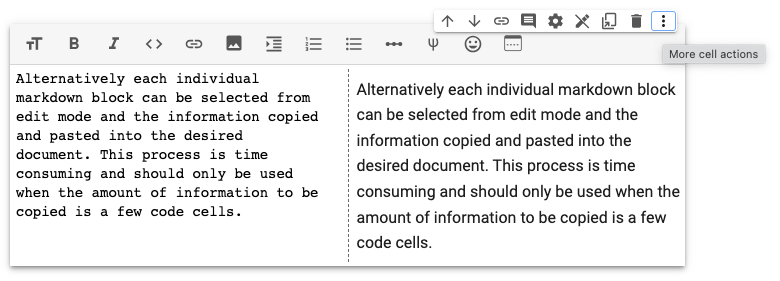

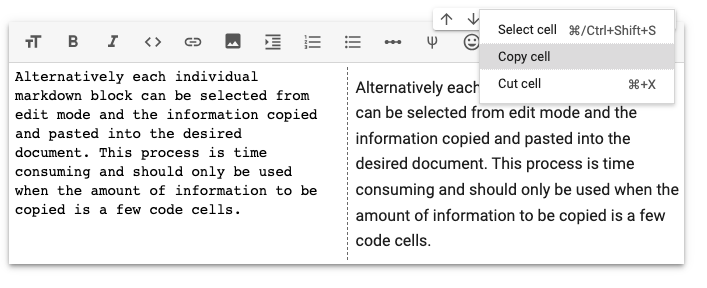